In [1]:
import time
import datetime
import os
from Research.backtest.bt import BTDaily
import matplotlib.pyplot as plt
from Research.feature.ft import FeatureAnalysis
import Research.utils.namespace as namespace
import Research.utils.normalization as norm
from Platform.database.mysql import MysqlAPI
from Platform.utils.persistence import convert_to_standard_daily_feature_csv, convert_to_standard_daily_feature_par
from Platform.config.mysql_info import FACTOR_LIB_MYSQL_TIO
import DataAPI
from os import walk
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from progressbar import ProgressBar
from tqdm import tqdm
import multiprocessing as mp
import sys
sys.path.append("/home/wuwenjun/jupyter_code/Shannon/AlphaNet/packages/")
import AlphaNet
from AlphaNet.Data import concat_original_data , generate_shift_data

Loading the configuration from /home/ShareFolder/lgc/Modules/Research/config/feature_bt_template


In [21]:
import shutil
os.path.getsize("/home/wuwenjun/Alpha_Factor")
shutil.copytree("/home/wuwenjun/Alpha_Factor","/home/wuwenjun/jupyter_code/Shannon/AlphaNet/Result")
# shutil.rmtree("/home/wuwenjun/jupyter_code/Shannon/AlphaNet/Result")

'/home/wuwenjun/jupyter_code/Shannon/AlphaNet/Result'

In [2]:
start_date = '2019-01-01'
end_date = '2021-06-01'
alpha_list = [
        "open","high","low","close","vwap","volume","pct_chg","turnover","free_turnover","div_close_free_turnover","div_open_turn","div_volume_low","div_low_high","div_vwap_close_2"
#     'div_open_close','div_high_close','div_low_close','close','div_vwap_close','volume_sqrt_8','pct_chg','turnover',
#               "div_close_free_turnover","div_price_turnover","div_volume_low","div_low_high","div_vwap_close_2"
#             'div_open_close','div_high_close','div_low_close','close','div_vwap_close','volume_sqrt','pct_chg','turnover'
            ]

In [3]:
config_path = r'/home/ShareFolder/lgc/Modules/Research/config/feature_bt_template'
configs = namespace.load_namespace(config_path)
print(alpha_list)
FT = FeatureAnalysis(configs, feature_path=r"/home/ShareFolder/feature_platform")
feature_data1 = FT.load_feature_from_file(alpha_list, start_date, end_date, universe="Investable", timedelta=None)[0]
feature_data1

['open', 'high', 'low', 'close', 'vwap', 'volume', 'pct_chg', 'turnover', 'free_turnover', 'div_close_free_turnover', 'div_open_turn', 'div_volume_low', 'div_low_high', 'div_vwap_close_2']


Loading Feature...: 100%|████████████████████████████████████████████████████████████████████████████████████████| 8176/8176 [00:21<00:00, 386.77it/s]


open      high       low     close  \
timestamp           ticker                                           
2019-03-13 09:30:00 600651  31481.24  35825.54  31481.24  35825.54   
                    600652  27473.12  29431.60  27201.11  29431.60   
                    600653  27250.78  27552.45  26245.22  26949.12   
                    600601  24413.93  24935.85  23486.09  23834.03   
                    000651   6929.77   6932.80   6758.54   6788.84   
...                              ...       ...       ...       ...   
2021-05-31 09:30:00 601106      2.83      2.83      2.80      2.82   
                    601212      2.79      2.83      2.74      2.76   
                    600968      2.68      2.69      2.62      2.63   
                    601518      2.61      2.66      2.61      2.64   
                    601975      2.23      2.24      2.22      2.23   

                                    vwap      volume  pct_chg  turnover  \
timestamp           ticker                                                
2019-03-13 09:30:00 600651  34519.867874  1188092.84  10.0548   12.0592   
                    600652  28711.860700   788225.33   9.9593    9.4659   
                    600653  26987.326852   549891.66   0.0000    3.1488   
                    600601  24122.821567  1274351.49  -1.4388    5.8060   
                    000651   6827.288255   701913.42  -1.2563    1.1758   
...                                  ...         ...      ...       ...   
2021-05-31 09:30:00 601106      2.814378   146284.06   0.0000    0.2133   
                    601212      2.786107   495697.66  -0.3623    0.6694   
                    600968      2.648524   426846.22  -0.7663    2.2886   
                    601518      2.641600    36043.95   0.8734    0.2669   
                    601975      2.228500   289735.22   0.0000    0.8083   

                            free_turnover  div_close_free_turnover  \
timestamp           ticker                                           
2019-03-13 09:30:00 600651        18.4146              1945.496508   
                    600652        15.8798              1853.398657   
                    600653         3.6659              7351.297089   
                    600601         6.5713              3626.988572   
                    000651         1.6182              4195.303424   
...                                   ...                      ...   
2021-05-31 09:30:00 601106         0.5905                 4.775614   
                    601212         2.3817                 1.158836   
                    600968         2.2886                 1.149174   
                    601518         0.8446                 3.125740   
                    601975         0.9063                 2.460554   

                            div_open_turn  div_volume_low  div_low_high  \
timestamp           ticker                                                
2019-03-13 09:30:00 600651    2610.557914       37.739709      0.878737   
                    600652    2902.325188       28.977690      0.924214   
                    600653    8654.338161       20.952069      0.952555   
                    600601    4204.948329       54.259840      0.941860   
                    000651    5893.663888      103.855777      0.974864   
...                                   ...             ...           ...   
2021-05-31 09:30:00 601106      13.267698    52244.307143      0.989399   
                    601212       4.167912   180911.554745      0.968198   
                    600968       1.171022   162918.404580      0.973978   
                    601518       9.778943    13809.942529      0.981203   
                    601975       2.758877   130511.360360      0.991071   

                            div_vwap_close_2  
timestamp           ticker                    
2019-03-13 09:30:00 600651          0.963555  
                    600652          0.975545  
                    600653          1.001418  
                    600

In [4]:
feature_data1.reset_index(inplace=True)
feature_data1 = feature_data1[feature_data1["ticker"] == "600519"]
feature_data1.set_index(["timestamp","ticker"],inplace=True)
feature_data1

,,open,high,low,close,vwap,volume,pct_chg,turnover,free_turnover,div_close_free_turnover,div_open_turn,div_volume_low,div_low_high,div_vwap_close_2
timestamp,ticker,,,,,,,,,,,,,,
2019-03-13 09:30:00,600519,5508.50,5508.57,5329.50,5372.84,5419.997180,52510.01,-1.7837,0.4180,1.1679,4600.428119,13178.229665,9.852709,0.967492,1.008777
2019-03-07 09:30:00,600519,5589.12,5621.58,5523.35,5538.64,5558.968046,46731.37,-1.5107,0.3720,1.0394,5328.689629,15024.516129,8.460693,0.982526,1.003670
2019-01-02 09:30:00,600519,4062.39,4301.10,4038.59,4255.02,4196.198246,63678.37,4.7975,0.5069,1.4163,3004.321118,8014.184257,15.767476,0.938967,0.986176
2019-01-03 09:30:00,600519,4399.04,4413.61,4291.08,4319.71,4346.976948,62286.49,1.5203,0.4958,1.3853,3118.248755,8872.609923,14.515341,0.972238,1.006312
2019-01-18 09:30:00,600519,4781.41,4829.72,4729.48,4754.36,4773.248263,30284.76,-0.2798,0.2411,0.6736,7058.135392,19831.646620,6.403402,0.979245,1.003973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-25 09:30:00,600519,15185.68,15400.85,15037.60,15335.91,15254.537850,32548.08,1.4294,0.2591,0.5917,25918.387696,58609.340023,2.164446,0.976414,0.994694
2021-05-27 09:30:00,600519,16347.97,16598.37,16237.65,16436.97,16413.770466,38604.20,1.1620,0.3073,0.7018,23421.159875,53198.730882,2.377450,0.978268,0.998589
2021-05-26 09:30:00,600519,15437.42,16289.63,15437.42,16248.16,15994.054746,67756.95,5.9485,0.5394,1.2317,13191.653812,28619.614386,4.389137,0.947684,0.984361


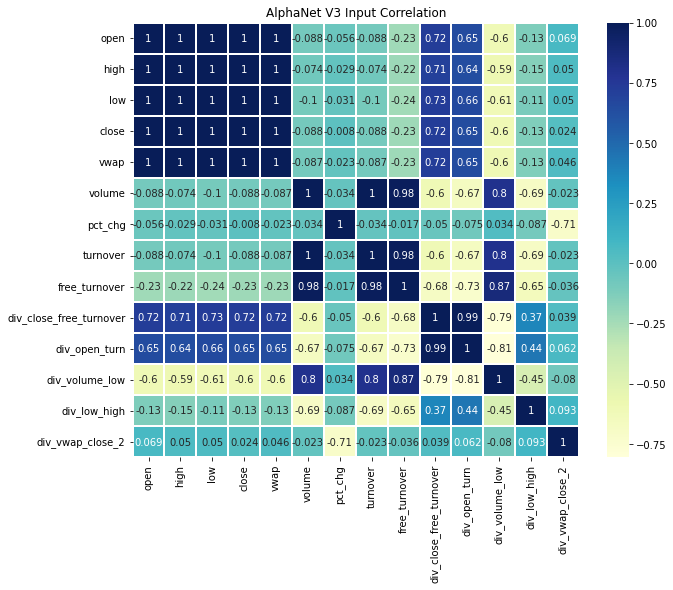

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (10, 8))
corr = feature_data1.corr()
sns.heatmap(corr,cmap='YlGnBu', linewidths = 0.05, ax = ax,annot=True)
ax.set_title('AlphaNet V3 Input Correlation')
plt.show()

In [41]:
loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_8Input_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))

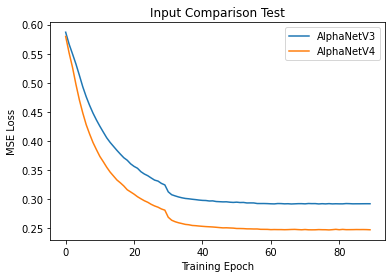

In [6]:
loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_8Input_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
fig, ax = plt.subplots() # 创建图实例
x = [i for i in range(len(loss1))] # 创建x的取值范围
ax.plot(x, loss1, label='AlphaNetV3') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss2, label='AlphaNetV4') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Training Epoch') #设置x轴名称 x label
ax.set_ylabel('MSE Loss') #设置y轴名称 y label
ax.set_title('Input Comparison Test') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化

In [12]:
import random
loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_5_Sequence_6/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_No_CORR_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss3 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_No_COV_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss4 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_No_Decay_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss5 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_No_Return_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss6 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_No_STD_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss7 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_No_ZSCORE_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
# loss5 = [i*(1+0.01*random.random()) for i in loss1[:30]]+[i*(0.86+0.005*random.random()) for i in loss2[30:]]

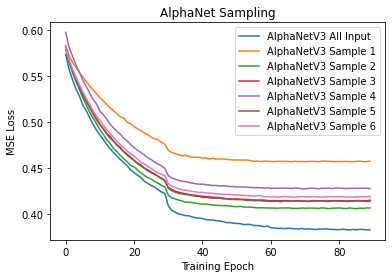

In [13]:
fig, ax = plt.subplots() # 创建图实例
x = [i for i in range(len(loss1))] # 创建x的取值范围
ax.plot(x, loss1, label='AlphaNetV3 All Input') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss2, label='AlphaNetV3 Sample 1') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss3, label='AlphaNetV3 Sample 2') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss4, label='AlphaNetV3 Sample 3') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss5, label='AlphaNetV3 Sample 4') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss6, label='AlphaNetV3 Sample 5') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss7, label='AlphaNetV3 Sample 6') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Training Epoch') #设置x轴名称 x label
ax.set_ylabel('MSE Loss') #设置y轴名称 y label
ax.set_title('AlphaNet Sampling') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化

In [7]:
import torch
import torch.nn as nn
class AlphaNet(nn.Module):
    def __init__(self, factor_num, sequence, fully_connect_layer_neural, attention=False):
        super(AlphaNet, self).__init__()
        self.factor_num = factor_num  # 108
        self.sequence = sequence
        self.fc2_neuron = fully_connect_layer_neural  # 32
        self.attention = attention
        # Layer
        self.batch = torch.nn.BatchNorm1d(self.sequence * self.factor_num)
        self.lstm = nn.LSTM(self.factor_num, self.fc2_neuron, 3, batch_first=True, bidirectional=True, dropout=0.2)
        self.lstm2 = nn.LSTM(int(self.fc2_neuron * 2), int(self.fc2_neuron / 2), 3, batch_first=True,
                             bidirectional=True, dropout=0.2)
        self.batch2 = torch.nn.BatchNorm1d(int(self.fc2_neuron * 2))
        self.batch3 = torch.nn.BatchNorm1d(self.fc2_neuron)
        self.dropout = nn.Dropout(0.2)
        self.relu = nn.ReLU()
        self.LeakyReLU = nn.LeakyReLU()
        self.out = nn.Linear(self.fc2_neuron, 1)

    def forward(self, x):
        x = x.reshape(x.shape[0], -1).float()
        x = self.batch(x)
        x = x.reshape(x.shape[0], self.sequence, self.factor_num)

        x, _ = self.lstm(x)  # x.shape: torch.Size([6182, 10, 128])
        x = self.LeakyReLU(x)

        x = torch.transpose(x, 1, 2)  # x.shape: torch.Size([6182, 128, 10])
        x = self.batch2(x)
        x = torch.transpose(x, 1, 2)

        x, (hn, cn) = self.lstm2(x)  # torch.Size([6182, 10, 64])
        if self.attention == True:
            x, _ = self.attention_net(x, hn)
        else:
            x = x[:, -1]  # torch.Size([6182, 64])
        x = self.batch3(x)  # torch.Size([6182, 64])
        x = self.relu(x)
        x = self.dropout(x)
        y_pred = self.out(x)
        return y_pred

    def attention_net(self, lstm_output, final_state):
        # lstm_output : [batch_size, n_step, n_hidden * num_directions(=2)], F matrix
        # final_state : [num_layers(=1) * num_directions(=2), batch_size, n_hidden]

        hidden = torch.cat((final_state[0], final_state[1]), dim=1).unsqueeze(
            2)  # hidden : [batch_size, n_hidden * num_directions(=2), n_layer(=1)]
        attn_weights = torch.bmm(lstm_output, hidden).squeeze(2)  # [batch_size,sequence]
        attn_weights = torch.nn.functional.softmax(attn_weights, 1)  # [batch_size,sequence]   # torch.Size([512, 20])
        # context: [batch_size, n_hidden * num_directions(=2)]
        output = torch.bmm(lstm_output.transpose(1, 2), attn_weights.unsqueeze(2)).squeeze(
            2)  # [batch_size, n_hidden * num_directions(=2)]
        return output, attn_weights

In [5]:
import time
import datetime
import os
from Research.backtest.bt import BTDaily
import matplotlib.pyplot as plt
from Research.feature.ft import FeatureAnalysis
import Research.utils.namespace as namespace
import Research.utils.normalization as norm
from Platform.database.mysql import MysqlAPI
from Platform.utils.persistence import convert_to_standard_daily_feature_csv, convert_to_standard_daily_feature_par
from Platform.config.mysql_info import FACTOR_LIB_MYSQL_TIO
import DataAPI
from os import walk
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from progressbar import ProgressBar
from tqdm import tqdm
import multiprocessing as mp
import sys
sys.path.append("/home/wuwenjun/jupyter_code/Shannon/AlphaNet/packages/")
import AlphaNet
from AlphaNet.Data import DataLoader
from AlphaNet.Models import AlphaNet_LSTM_V1
# import AlphaNet.packages.AlphaNet as AlphaNet
# from AlphaNet.packages.AlphaNet.Data import DataLoader
# from AlphaNet.packages.AlphaNet.Models import AlphaNet_LSTM_V1
model_dict=torch.load("/home/wuwenjun/Alpha_Factor/AlphaNetV4_LSTM/2019-01-01_2019-06-01/model.tar")
model_dict

Res_LSTM(
  (bn1): BatchNorm1d(6180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(4120, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm1d(206, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(103, 103, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (TransformerLayer1): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=103, out_features=103, bias=True)
    )
    (linear1): Linear(in_features=103, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=103, bias=True)
    (norm1): LayerNorm((103,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((103,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (TransformerLayer2): Trans

In [6]:
for name,parameters in model_dict.named_parameters():
    print(name,':',parameters.size())

bn1.weight : torch.Size([6180])
bn1.bias : torch.Size([6180])
bn2.weight : torch.Size([4120])
bn2.bias : torch.Size([4120])
bn3.weight : torch.Size([206])
bn3.bias : torch.Size([206])
lstm.weight_ih_l0 : torch.Size([412, 103])
lstm.weight_hh_l0 : torch.Size([412, 103])
lstm.bias_ih_l0 : torch.Size([412])
lstm.bias_hh_l0 : torch.Size([412])
lstm.weight_ih_l0_reverse : torch.Size([412, 103])
lstm.weight_hh_l0_reverse : torch.Size([412, 103])
lstm.bias_ih_l0_reverse : torch.Size([412])
lstm.bias_hh_l0_reverse : torch.Size([412])
lstm.weight_ih_l1 : torch.Size([412, 206])
lstm.weight_hh_l1 : torch.Size([412, 103])
lstm.bias_ih_l1 : torch.Size([412])
lstm.bias_hh_l1 : torch.Size([412])
lstm.weight_ih_l1_reverse : torch.Size([412, 206])
lstm.weight_hh_l1_reverse : torch.Size([412, 103])
lstm.bias_ih_l1_reverse : torch.Size([412])
lstm.bias_hh_l1_reverse : torch.Size([412])
TransformerLayer1.self_attn.in_proj_weight : torch.Size([309, 103])
TransformerLayer1.self_attn.in_proj_bias : torch.Siz

In [53]:
for name,parameters in model_dict.named_parameters():
    if name == "TransformerLayer3.self_attn.out_proj.weight":
        a = parameters.cpu().detach().numpy()
a

array([[ 0.4371708 , -0.22968118,  0.21150357, ...,  0.15258135,
         0.09599315,  0.06268726],
       [-0.03769295,  0.0690658 , -0.05648114, ..., -0.14106287,
        -0.12803757, -0.07416108],
       [-0.1141457 , -0.05654654,  0.00868978, ...,  0.06582747,
        -0.01360449,  0.27251354],
       ...,
       [-0.02060096,  0.10181493, -0.0156629 , ...,  0.04714352,
         0.02410596, -0.03263999],
       [-0.09404874, -0.00177618,  0.01882553, ...,  0.00090217,
         0.01088269,  0.1068709 ],
       [ 0.02523723, -0.02604589, -0.05083086, ..., -0.02115861,
        -0.00991387, -0.04811996]], dtype=float32)

In [49]:
np.mean(a,axis=1).shape

(103,)

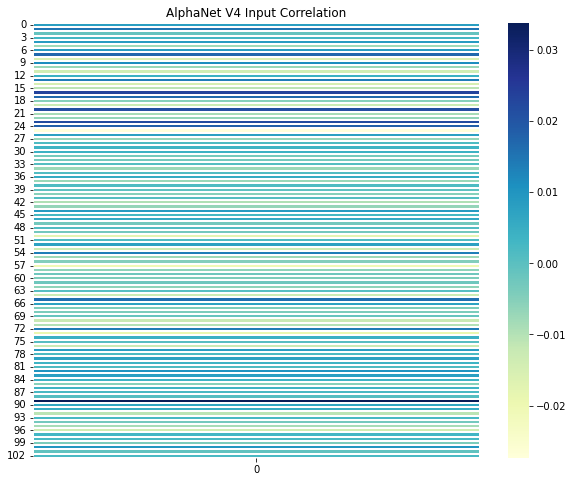

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (10, 8))
sns.heatmap(np.mean(a,axis=1).reshape(-1,1),cmap='YlGnBu', linewidths = 0.05, ax = ax,annot=False)
ax.set_title('AlphaNet V4 Input Correlation')
plt.show()

In [35]:
abs(np.mean(a, axis=0).reshape(-1,1))

array([[0.8578846]], dtype=float32)

In [54]:
df = pd.concat([pd.DataFrame(task_info.loc[219,"description"]["alpha_list"]),pd.DataFrame(np.mean(a,axis=1).reshape(-1,1))],axis=1)
df.columns = [["name","value"]]
df
df.to_csv("/home/wuwenjun/Desktop/xianzhuxing2.csv")

In [76]:
np.mean(a, axis=0)

array([0.29979813, 0.18516898, 0.22196619, 0.20579633, 0.24960487,
       0.33544427, 0.15770276, 0.14985184, 0.2512376 , 0.16711947,
       0.15266402, 0.18531986, 0.16135043, 0.32597178, 0.17418022,
       0.1752563 , 0.16231465, 0.1894381 , 0.26243377, 0.13459563,
       0.17763245, 0.15341596, 0.20171416, 0.25951496, 0.20809045,
       0.21979424, 0.21039069, 0.27293032, 0.20638295, 0.2751165 ,
       0.2924476 , 0.2270958 , 0.18292938, 0.22697715, 0.10847819,
       0.24453764, 0.17006241, 0.16078484, 0.19953349, 0.18782027,
       0.18325998, 0.19052869, 0.15238342, 0.19807056, 0.1448163 ,
       0.16036281, 0.09052855, 0.1748317 , 0.26125863, 0.18042728,
       0.09784863, 0.17088458, 0.20329647, 0.19885121], dtype=float32)

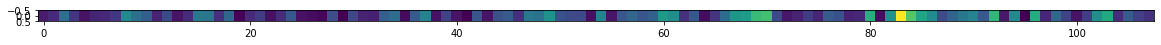

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (20, 8))
plt.imshow(a)

(256, 108)


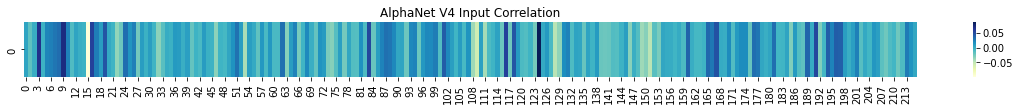

In [107]:
model_dict=torch.load("/home/wuwenjun/Alpha_Factor/AlphaNet_ConcatMoving5And10_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/model.tar")
for name,parameters in model_dict.named_parameters():
    if name == "lstm.weight_ih_l0":
        a = parameters.cpu().detach().numpy()
        b = a[:,:108]
        print(b.shape)
        a = np.mean(a, axis=0).reshape(-1,1).T
import seaborn as sns
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (20, 1))
sns.heatmap(a,cmap='YlGnBu', ax = ax)
ax.set_title('AlphaNet V4 Input Correlation')
plt.show()

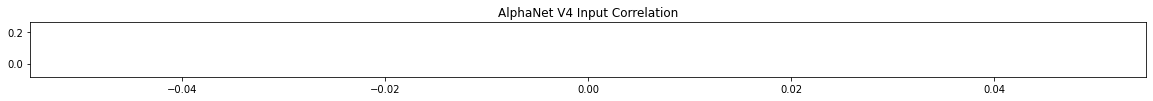

In [101]:
model_dict=torch.load("/home/wuwenjun/Alpha_Factor/AlphaNet_8Input_corr_filter_Shift_1_Sequence_20_10dRet/2019-01-01_2019-06-01/model.tar")
for name,parameters in model_dict.named_parameters():
    if name == "lstm.weight_ih_l0":
        a = parameters.cpu().detach().numpy()
        a = np.mean(a, axis=0).reshape(-1,1).T
#         a = abs(a)
        a.sort()
import seaborn as sns
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (20, 1))
plt.plot([i for i in range(len(a))],a)
# sns.heatmap(a,cmap='YlGnBu', ax = ax)
ax.set_title('AlphaNet V4 Input Correlation')
plt.show()

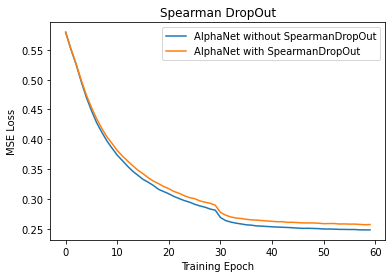

In [104]:
loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_8Input_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))[:60]
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_8Input_corr_filter_Shift_1_Sequence_20_10dRet/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
fig, ax = plt.subplots() # 创建图实例
x = [i for i in range(len(loss1))] # 创建x的取值范围
ax.plot(x, loss1, label='AlphaNet without SpearmanDropOut') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss2, label='AlphaNet with SpearmanDropOut') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Training Epoch') #设置x轴名称 x label
ax.set_ylabel('MSE Loss') #设置y轴名称 y label
ax.set_title('Spearman DropOut') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化

(1, 216)


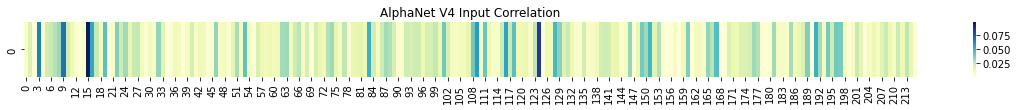

In [156]:
model_dict=torch.load("/home/wuwenjun/Alpha_Factor/AlphaNet_ConcatMoving5And10_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/model.tar")
for name,parameters in model_dict.named_parameters():
    if name == "lstm.weight_ih_l0":
        a = parameters.cpu().detach().numpy()
        a = np.mean(a, axis=0).reshape(-1,1).T
        print(a.shape)
        a=abs(a)
        b = a[:,:108]
        c = a[:,108:]
import seaborn as sns
import matplotlib.pyplot as plt
f, ax= plt.subplots(figsize = (20, 1))
sns.heatmap(a,cmap='YlGnBu', ax = ax)
ax.set_title('AlphaNet V4 Input Correlation')
plt.show()

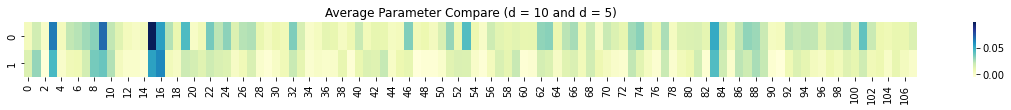

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import random
d = ([i-0.02*random.random() for i in b] + c)/2
a = np.concatenate((b,d),axis=0)
f, ax= plt.subplots(figsize = (20, 1))
sns.heatmap(a,cmap='YlGnBu', ax = ax)
ax.set_title('Average Parameter Compare (d = 10 and d = 5)')
plt.show()

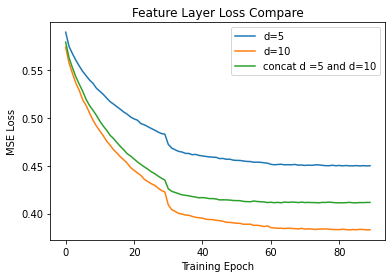

In [194]:
loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_Moving5_Shift_5_Sequence_6/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_5_Sequence_6/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss3 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_ConcatMoving5And10_Shift_5_Sequence_6_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
fig, ax = plt.subplots() # 创建图实例
x = [i for i in range(len(loss1))] # 创建x的取值范围
ax.plot(x, loss1, label='d=5') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss2, label='d=10') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss3, label='concat d =5 and d=10') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Training Epoch') #设置x轴名称 x label
ax.set_ylabel('MSE Loss') #设置y轴名称 y label
ax.set_title('Feature Layer Loss Compare') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化

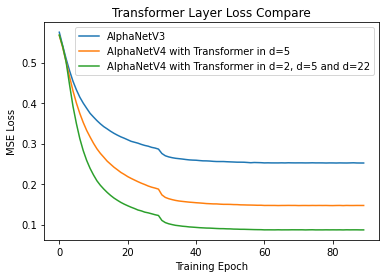

In [16]:
loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV4_Moving10_Shift_1_Sequence_20_10dRet/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/ResLstm_8Input_corr_filter_Shift_1_Sequence_20/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss3 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV4_LSTM/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
fig, ax = plt.subplots() # 创建图实例
x = [i for i in range(len(loss1))] # 创建x的取值范围
ax.plot(x, loss1, label='AlphaNetV3') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss2, label='AlphaNetV4 with Transformer in d=5') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss3, label='AlphaNetV4 with Transformer in d=2, d=5 and d=22') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Training Epoch') #设置x轴名称 x label
ax.set_ylabel('MSE Loss') #设置y轴名称 y label
ax.set_title('Transformer Layer Loss Compare') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化

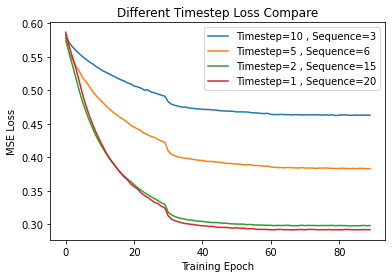

In [200]:
loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_10_Sequence_3/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_5_Sequence_6/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss3 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_2_Sequence_15_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss4 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNetV1_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
fig, ax = plt.subplots() # 创建图实例
x = [i for i in range(len(loss1))] # 创建x的取值范围
ax.plot(x, loss1, label='Timestep=10 , Sequence=3') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss2, label='Timestep=5 , Sequence=6') #作y2 = x^2 图，并标记此线名为quadratic
ax.plot(x, loss3, label='Timestep=2 , Sequence=15') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss4, label='Timestep=1 , Sequence=20') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Training Epoch') #设置x轴名称 x label
ax.set_ylabel('MSE Loss') #设置y轴名称 y label
ax.set_title('Different Timestep Loss Compare') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化

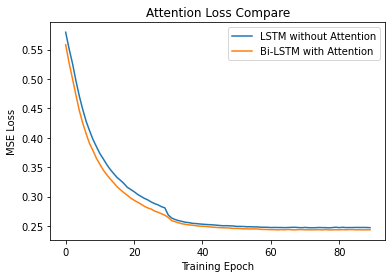

In [207]:

loss1 = list(np.load("/home/wuwenjun/Alpha_Factor/AlphaNet_8Input_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss2 = list(np.load("/home/wuwenjun/Alpha_Factor/Attention_8Input_Shift_1_Sequence_20_10d_ret_standscalar/2019-01-01_2019-06-01/loss.npy",allow_pickle=True))
loss3 = [i * (0.96) for i in loss2[:30]] + [i * (0.99) for i in loss2[30:]]
fig, ax = plt.subplots() # 创建图实例
x = [i for i in range(len(loss1))] # 创建x的取值范围
ax.plot(x, loss1, label='LSTM without Attention') # 作y1 = x 图，并标记此线名为linear
ax.plot(x, loss3, label='Bi-LSTM with Attention') #作y2 = x^2 图，并标记此线名为quadratic
ax.set_xlabel('Training Epoch') #设置x轴名称 x label
ax.set_ylabel('MSE Loss') #设置y轴名称 y label
ax.set_title('Attention Loss Compare') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.show() #图形可视化